  0%|          | 0/49 [00:00<?, ?it/s]

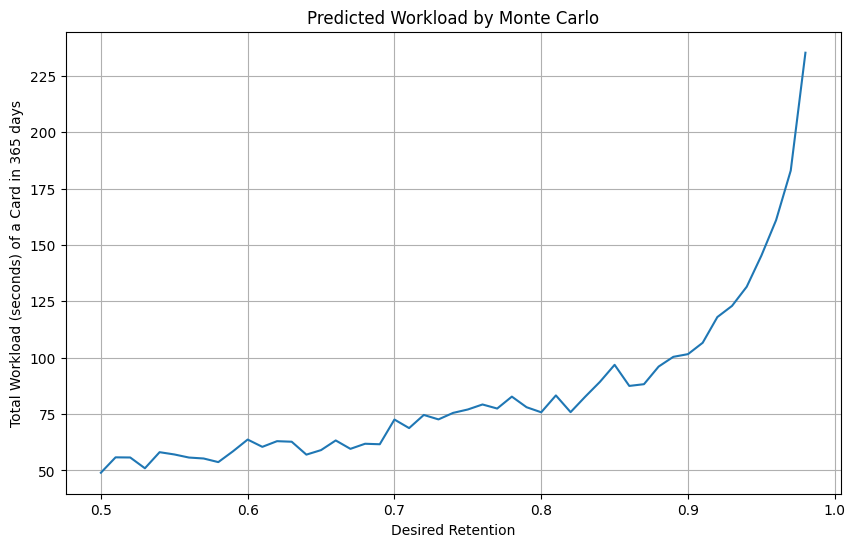

In [1]:
from fsrs_optimizer import simulate
from config import *

sample_size = 100
workload_list = []

for desired_retention in tqdm(R_RANGE):
    (
        card_table,
        review_cnt_per_day,
        learn_cnt_per_day,
        memorized_cnt_per_day,
        cost_per_day,
        _,
    ) = simulate(
        w=DEFAULT_PARAMETER,
        request_retention=desired_retention,
        deck_size=learn_days * sample_size,
        learn_span=learn_days,
        max_cost_perday=np.inf,
        learn_limit_perday=sample_size,
        review_limit_perday=np.inf,
        max_ivl=np.inf,
        first_rating_prob=np.array([0.2, 0, 0.8, 0]),
        review_rating_prob=np.array([0, 1, 0]),
        learning_step_count=0,
        relearning_step_count=0,
        state_rating_costs=np.array(
            [
                [LEARN_COST, LEARN_COST, LEARN_COST, LEARN_COST],
                [FORGET_COST, 0, RECALL_COST, 0],
                [0, 0, 0, 0],
            ]
        ),
    )
    workload_list.append(cost_per_day[-1] / sample_size)

plt.figure(figsize=(10, 6))
plt.plot(R_RANGE, workload_list)
plt.grid(True)
plt.title("Predicted Workload by Monte Carlo")
plt.xlabel("Desired Retention")
plt.ylabel(f"Total Workload (seconds) of a Card in {learn_days} days")
plt.show()